In [2]:
# Imprting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\kaush\Downloads\bollywood.csv", encoding = 'iso-8859-1')
df

,S No,Release Date,Movie Name,Release Date (N / LW / Festive),Genre - Defined,Budget,Box Office Collection,Youtube Views,Youtube Likes,Youtube Dislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


In [5]:
df.shape

(149, 10)

In [6]:
df.head()

,S No,Release Date,Movie Name,Release Date (N / LW / Festive),Genre - Defined,Budget,Box Office Collection,Youtube Views,Youtube Likes,Youtube Dislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


In [7]:
df.isna().sum()

S No                               0
Release Date                       0
Movie Name                         0
Release Date (N / LW / Festive)    0
Genre - Defined                    0
Budget                             0
Box Office Collection              0
Youtube Views                      0
Youtube Likes                      0
Youtube Dislikes                   0
dtype: int64

In [8]:
df[df.duplicated()].sum()

S No                                 0
Release Date                         0
Movie Name                           0
Release Date (N / LW / Festive)      0
Genre - Defined                      0
Budget                               0
Box Office Collection              0.0
Youtube Views                        0
Youtube Likes                        0
Youtube Dislikes                     0
dtype: object

## From the data we can conclude that there are no null values and no duplicate values,
## But we can see in Genre category there is duplicacy in "Thriller and Action" due to extra space, so we will fix that.

In [9]:
df["Genre - Defined"].value_counts()

Genre - Defined
Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: count, dtype: int64

In [10]:
df["Genre - Defined"].replace({"Thriller " : "Thriller", "Action ": "Action"},inplace = True)

df.head()


,S No,Release Date,Movie Name,Release Date (N / LW / Festive),Genre - Defined,Budget,Box Office Collection,Youtube Views,Youtube Likes,Youtube Dislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


In [11]:
df["Genre - Defined"].value_counts()

Genre - Defined
Comedy      36
 Drama      35
Thriller    29
Romance     25
Action      24
Name: count, dtype: int64

In [12]:
df.head()

,S No,Release Date,Movie Name,Release Date (N / LW / Festive),Genre - Defined,Budget,Box Office Collection,Youtube Views,Youtube Likes,Youtube Dislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


In [13]:
dff = df.groupby("Genre - Defined")["Box Office Collection"].mean().round(2)
dff

Genre - Defined
 Drama      65.79
Action      91.68
Comedy      46.12
Romance     52.84
Thriller    27.94
Name: Box Office Collection, dtype: float64

#### To find the average  box office collection across different Genre

## All the neccessary data cleaning is done so we will proceed for visualisation

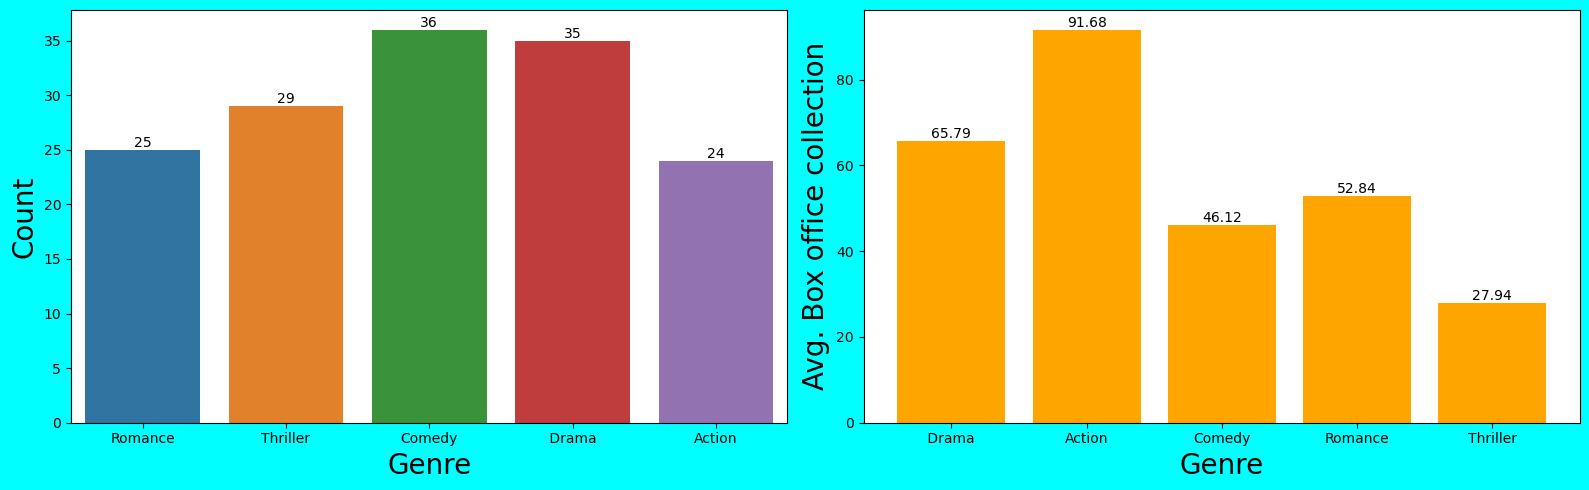

In [29]:
%matplotlib inline
plt.figure(figsize = (16,5), facecolor = "cyan", edgecolor = "yellow", frameon = True, layout = "tight")
plt.subplot(1,2,1)
ax = sns.countplot(x = "Genre - Defined", data = df, width = 0.8)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Genre", fontsize = 20, color ="black")
plt.ylabel("Count",fontsize = 20, color ="black")
plt.subplot(1,2,2)
ax2 = dff.plot(kind = "bar", width = 0.8, color = "orange")
for i in ax2.containers:
    ax2.bar_label(i)
plt.ylabel("Avg. Box office collection", fontsize = 20, color ="black")
plt.xlabel("Genre",fontsize = 20, color = "black")
plt.xticks(rotation = 0)
plt.show()

In [15]:
df.head()

,S No,Release Date,Movie Name,Release Date (N / LW / Festive),Genre - Defined,Budget,Box Office Collection,Youtube Views,Youtube Likes,Youtube Dislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


# we will convert "Youtube views" into million 

In [31]:
df["Views"] = df["Youtube Views"]/1000000

df.head()

,S No,Release Date,Movie Name,Release Date (N / LW / Festive),Genre - Defined,Budget,Box Office Collection,Youtube Views,Youtube Likes,Youtube Dislikes,Views
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,8.576361
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,1.087320
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,0.572336
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,0.042626
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,3.113427


In [32]:
df.groupby("Genre - Defined").Views.sum()


Genre - Defined
 Drama       93.525532
Action      136.611593
Comedy       91.313029
Romance      86.882563
Thriller     89.017350
Name: Views, dtype: float64

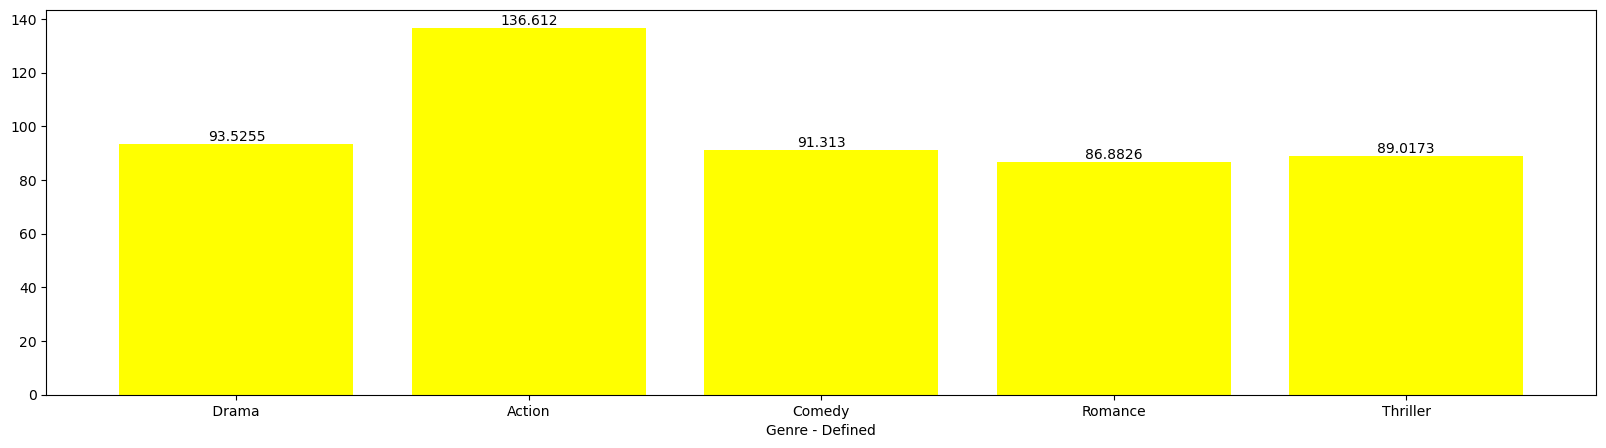

In [43]:
plt.figure(figsize = (20,5))
ax = df.groupby("Genre - Defined").Views.sum().plot(kind = "bar", width = 0.8, color = "yellow")
plt.xticks(rotation = 0)
for i in ax.containers:
    ax.bar_label(i)

## we can find from the graph that "Action" Genre has the most youtube views.

In [19]:
df.head()

,S No,Release Date,Movie Name,Release Date (N / LW / Festive),Genre - Defined,Budget,Box Office Collection,Youtube Views,Youtube Likes,Youtube Dislikes,Views
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,8.576361
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,1.087320
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,0.572336
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,0.042626
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,3.113427


## Taking out only numerical columns for ploting correlation using heat maps

In [20]:
dff = df[df.columns[5:]]
dff

,Budget,Box Office Collection,Youtube Views,Youtube Likes,Youtube Dislikes,Views
0,36,104.00,8576361,26622,2527,8.576361
1,10,12.00,1087320,1129,137,1.087320
2,10,4.00,572336,586,54,0.572336
3,7,0.35,42626,86,19,0.042626
4,18,10.80,3113427,4512,1224,3.113427
...,...,...,...,...,...,...
144,15,30.00,3250917,8185,615,3.250917
145,13,32.10,5592977,15464,1513,5.592977
146,32,12.00,2316047,4289,807,2.316047
147,5,11.89,4674795,3706,762,4.674795


In [21]:
dff.corr()

,Budget,Box Office Collection,Youtube Views,Youtube Likes,Youtube Dislikes,Views
Budget,1.000000,0.650401,0.589038,0.608916,0.665343,0.589038
Box Office Collection,0.650401,1.000000,0.588632,0.682517,0.623941,0.588632
Youtube Views,0.589038,0.588632,1.000000,0.884055,0.846739,1.000000
Youtube Likes,0.608916,0.682517,0.884055,1.000000,0.859730,0.884055
Youtube Dislikes,0.665343,0.623941,0.846739,0.859730,1.000000,0.846739
Views,0.589038,0.588632,1.000000,0.884055,0.846739,1.000000


<Axes: >

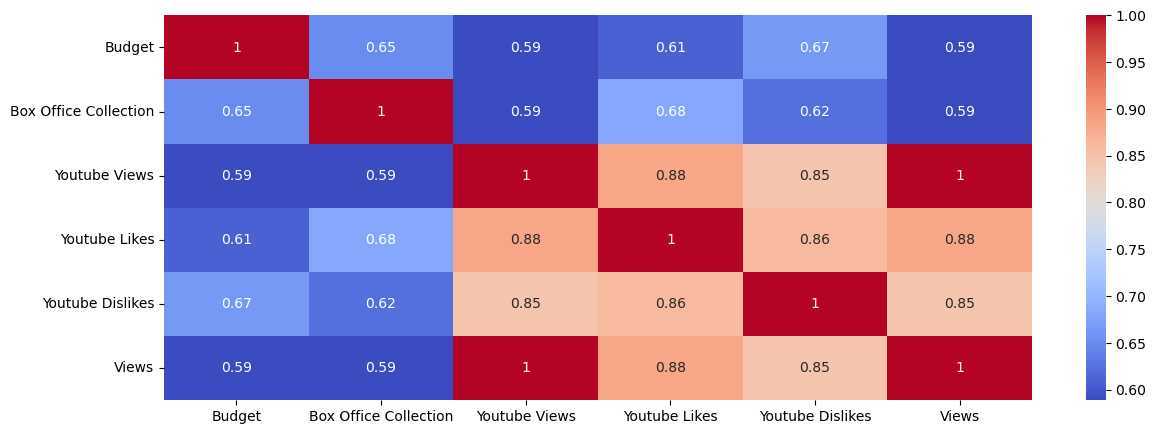

In [22]:
plt.figure(figsize = (14,5))
sns.heatmap(dff.corr(), annot = True, cmap = "coolwarm")

# From the heatmap we can conclude that there is Good correlation between All the numerical column. 

In [23]:
df.head()

,S No,Release Date,Movie Name,Release Date (N / LW / Festive),Genre - Defined,Budget,Box Office Collection,Youtube Views,Youtube Likes,Youtube Dislikes,Views
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,8.576361
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,1.087320
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,0.572336
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,0.042626
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,3.113427


In [24]:
df.columns

Index(['S No', 'Release Date', 'Movie Name', 'Release Date (N / LW / Festive)',
       'Genre - Defined', 'Budget', 'Box Office Collection', 'Youtube Views',
       'Youtube Likes', 'Youtube Dislikes', 'Views'],
      dtype='object')

In [25]:
df.groupby("Release Date (N / LW / Festive)")["Box Office Collection"].sum()

Release Date (N / LW / Festive)
FS    1522.10
HS    1343.15
LW    1474.83
N     3954.34
Name: Box Office Collection, dtype: float64

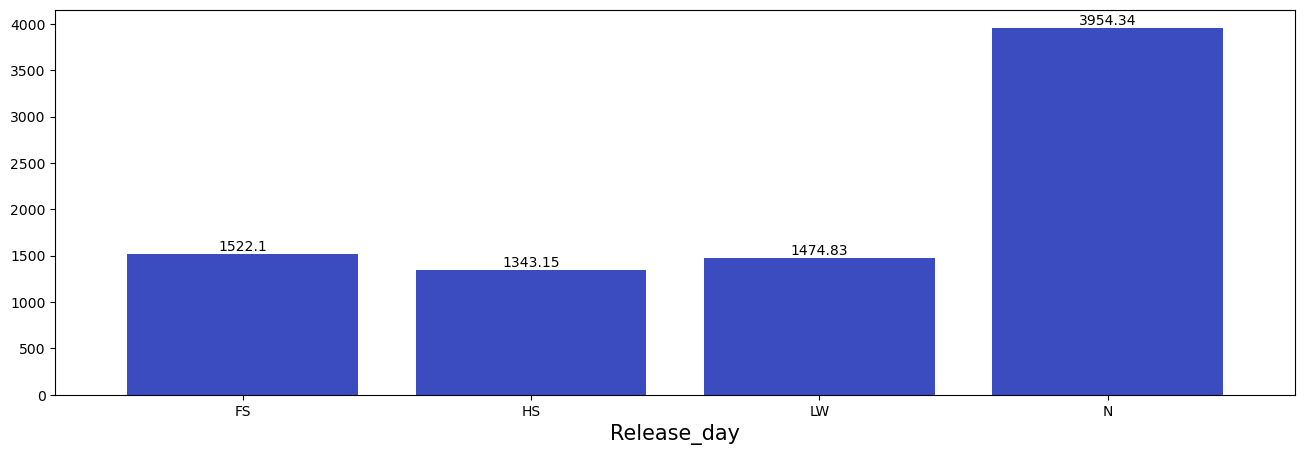

In [50]:
plt.figure(figsize = (16,5))
ax = df.groupby("Release Date (N / LW / Festive)")["Box Office Collection"].sum().plot(kind = "bar", cmap ="coolwarm",width = 0.8)
plt.xlabel("Release_day", fontsize = 15)
plt.xticks(rotation = 0)
for i in ax.containers:
    ax.bar_label(i)

## From the above graph we can conclude that most box office colletion is done on N day

### Now we will extract the year from the date to find out the total box office collection over the years

In [59]:
df["Release_year"] = df["Release Date"].dt.year
df.head()

,S No,Release Date,Movie Name,Release Date (N / LW / Festive),Genre - Defined,Budget,Box Office Collection,Youtube Views,Youtube Likes,Youtube Dislikes,Views,Release_year
0,1,2014-04-18,2 States,LW,Romance,36,104.00,8576361,26622,2527,8.576361,2014
1,2,2013-01-04,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,1.087320,2013
2,3,2014-07-18,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,0.572336,2014
3,4,2013-01-04,Rajdhani Express,N,Drama,7,0.35,42626,86,19,0.042626,2013
4,5,2014-07-04,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,3.113427,2014


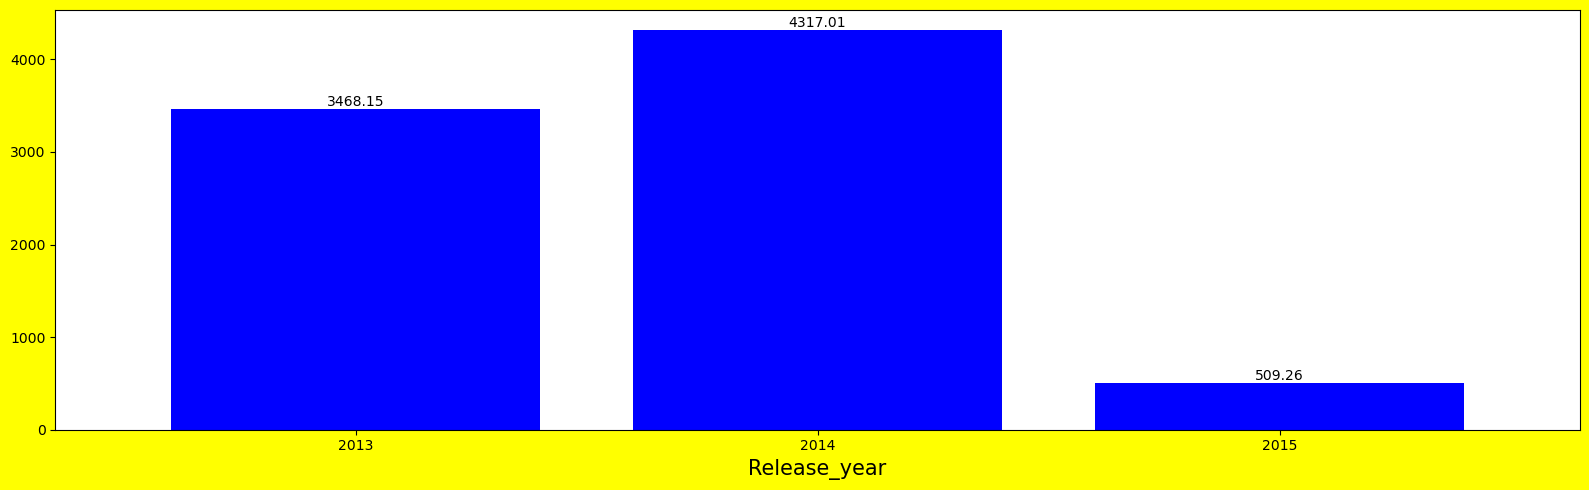

In [70]:
plt.figure(figsize = (16,5), facecolor = "yellow", edgecolor = "black", frameon = True, layout = "tight")
ax = df.groupby("Release_year")["Box Office Collection"].sum().plot(kind = "bar", color = "b", width = 0.8)
plt.xticks(rotation = 0)
plt.xlabel("Release_year",fontsize = 15)
for i in ax.containers:
    ax.bar_label(i)

## From above we can conclude that maximum box office collection was done in year 2014

# Overall Summary :

## - Overall box office collection of action movies is more than other Genre, however no. of movie release were of Comdey Genre

## - Action Genre also has the maximum youtube views as compared to other genres

## - Maximum box office collection is done in year 2014

## - Most of the box office collection is done on Non working day

## - There is a good correlation between all of the numerical columns